In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sbali\Downloads\train_set.csv")

In [3]:
df.head()

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...
3,85389000,lv na p trip unit for cvs switch parts of circ...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...


In [4]:
df.shape

(23615, 2)

In [5]:
df['label'].value_counts()

85389000    2936
85177090    2581
85369090    2438
39269099    2189
73181500    2033
85366990    1944
85238090    1720
85364900    1714
87089900    1673
33041000    1605
87082900    1451
84713010    1331
Name: label, dtype: int64

In [7]:
df['text_length'] = df['text'].str.len()
df.head()

,label,text,text_length
0,85389000,pdscpm gb part of panel of chiller,35
1,85389000,nm p economical extended rot hand parts for c...,80
2,85389000,lv ma pd trip unit for cvs parts of circuit br...,52
3,85389000,lv na p trip unit for cvs switch parts of circ...,57
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...,52


In [6]:
duplicate = df[df.duplicated('text')]
duplicate.groupby('label').count()

,text
label,
33041000,1058
39269099,564
73181500,759
84713010,767
85177090,971
85238090,1627
85364900,1262
85366990,914
85369090,1173


Text(0, 0.5, 'No. of text')

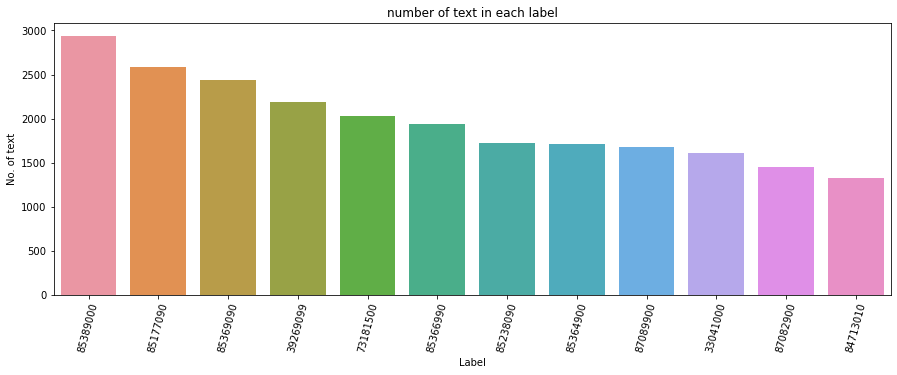

In [8]:
# no. text in each class

plt.figure(figsize=(15, 5))
highest_label = df['label'].value_counts().index
sns.countplot(data=df, x='label', order=highest_label)
plt.xticks(rotation=75)
plt.title('number of text in each label')
plt.xlabel('Label')
plt.ylabel('No. of text')


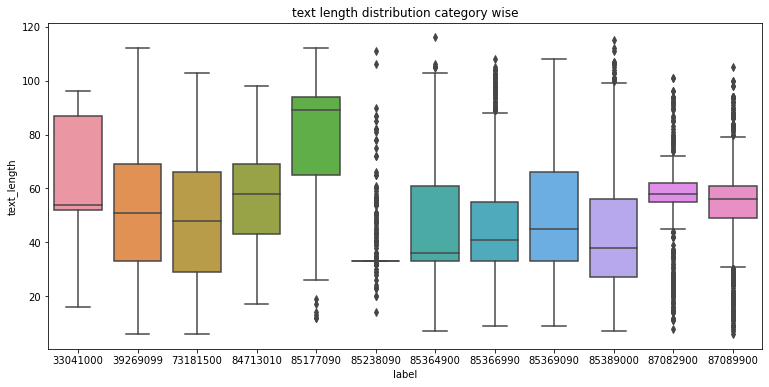

In [9]:
# text length distribution category wise   

plt.figure(figsize=(12.8,6))
plt.title('text length distribution category wise')
sns.boxplot(data=df, x='label', y='text_length');

In [11]:
df.loc[1]['text']

'nm  p economical extended rot hand parts for circuit breaker captive consumption'

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

### 1. Text cleaning 

In [35]:
## converting all text to lower case

df['text_clean'] = df['text'].str.lower()


#### 1.1 Punctuation signs

punct_signs = list("?:!.,;")


for punct_sign in punct_signs:
    df['text_clean'] = df['text'].str.replace(punct_sign, '')

C:\Users\sbali\AppData\Local\Temp/ipykernel_6816/2274859908.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['text_clean'] = df['text'].str.replace(punct_sign, '')


In [36]:
### Lemmatization

wordnet_lemmatizer = WordNetLemmatizer()

In [37]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['text_clean']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [38]:
df['lemmatized_text'] = lemmatized_text_list

In [39]:
#  stop words 
stop_words = list(stopwords.words('english'))

In [40]:
for stop_word in stop_words:

    df['cleaned_text'] = df['lemmatized_text'].str.replace(stop_word, '')

In [41]:
list_columns = ["label", "text", "cleaned_text"]
df = df[list_columns]

In [42]:
df.head()

,label,text,cleaned_text
0,85389000,pdscpm gb part of panel of chiller,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...,nm p economical extend rot hand part for circ...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...,lv ma pd trip unit for cvs part of circuit bre...
3,85389000,lv na p trip unit for cvs switch parts of circ...,lv na p trip unit for cvs switch part of circu...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...,lv tmd pd trip unit for cvs part of circuitbre...


In [ ]:
############## splitting data into train and test set 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_text'], 
                                                    df['label'], 
                                                    test_size=0.10, 
                                                    random_state= 10)

In [46]:
len(x_train) , len(x_test)

(21253, 2362)

In [ ]:
########## Transforming the text into tf-idf feature vectors

In [45]:
tfidf = TfidfVectorizer()
                        
features_train = tfidf.fit_transform(x_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(x_test).toarray()
labels_test = y_test
print(features_test.shape)

(21253, 12834)
(2362, 12834)


In [ ]:
########### Training xgboost Model 

In [49]:
from xgboost import XGBClassifier

In [53]:
model = XGBClassifier()
model.fit(features_train, labels_train)

[23:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred = model.predict(features_test)
y_pred

array([85177090, 85364900, 85389000, ..., 85389000, 85366990, 73181500],
      dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9106689246401355

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
b = list(df['label'].unique())
b = [str(i) for i in b]
b

['85389000',
 '85177090',
 '85369090',
 '39269099',
 '73181500',
 '85366990',
 '85364900',
 '85238090',
 '87089900',
 '33041000',
 '87082900',
 '84713010']

In [82]:
print(classification_report(y_test, y_pred, target_names=b))

              precision    recall  f1-score   support

    85389000       0.99      1.00      0.99       170
    85177090       0.80      0.80      0.80       230
    85369090       0.93      0.89      0.91       195
    39269099       0.98      1.00      0.99       142
    73181500       0.97      0.96      0.97       244
    85366990       1.00      0.99      0.99       172
    85364900       0.97      0.97      0.97       182
    85238090       0.92      0.87      0.89       208
    87089900       0.90      0.88      0.89       236
    33041000       0.80      0.90      0.85       289
    87082900       0.90      0.87      0.89       148
    84713010       0.88      0.84      0.86       146

    accuracy                           0.91      2362
   macro avg       0.92      0.91      0.92      2362
weighted avg       0.91      0.91      0.91      2362



In [85]:
confusion_mat = confusion_matrix(labels_test, y_pred)

confusion_mat

array([[170,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 184,   7,   2,   3,   0,   0,   3,   1,  19,   5,   5],
       [  0,   4, 174,   0,   2,   0,   0,   0,   0,  13,   1,   1],
       [  0,   0,   0, 142,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   9,   0,   0, 235,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 170,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0, 177,   0,   2,   3,   0,   0],
       [  0,   5,   0,   1,   1,   0,   0, 180,   9,  12,   0,   0],
       [  0,   2,   4,   0,   0,   0,   3,   9, 208,   9,   1,   0],
       [  1,  11,   1,   0,   1,   0,   3,   2,  10, 259,   0,   1],
       [  0,   3,   1,   0,   0,   0,   0,   1,   0,   4, 129,  10],
       [  0,  11,   1,   0,   0,   0,   0,   1,   1,   2,   7, 123]],
      dtype=int64)

In [88]:
confusion_mat.shape

(12, 12)

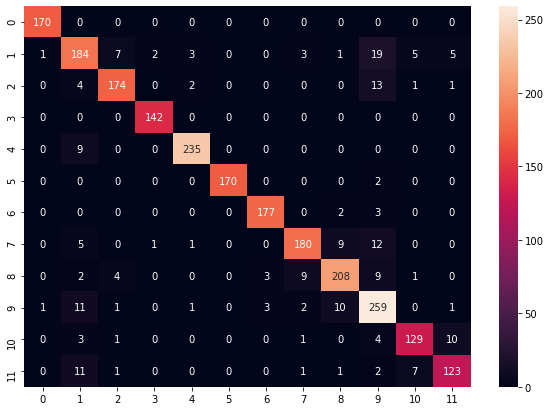

In [91]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_mat, annot=True, fmt='g')
plt.show()


In [ ]:
########################## Predicting the test file 

In [108]:
def cleaning_text(df):
    ## converting all text to lower case

    df['text_clean'] = df['text'].str.lower()
    
    #### 1.1 Punctuation signs

    punct_signs = list("?:!.,;")


    for punct_sign in punct_signs:
        df['text_clean'] = df['text'].str.replace(punct_sign, '')
        
    ### Lemmatization

    wordnet_lemmatizer = WordNetLemmatizer()
    nrows = len(df)
    lemmatized_text_list = []

    for row in range(0, nrows):
        lemmatized_list = []

        text = df.loc[row]['text_clean']
        text_words = text.split(" ")

        for word in text_words:
            lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

        lemmatized_text = " ".join(lemmatized_list)

        lemmatized_text_list.append(lemmatized_text)
        
    df['lemmatized_text'] = lemmatized_text_list
    
    #  stop words 
    stop_words = list(stopwords.words('english'))
    for stop_word in stop_words:
        df['cleaned_text'] = df['lemmatized_text'].str.replace(stop_word, '')
    
    list_columns = ["text", "cleaned_text"]
    df = df[list_columns]
    
    return df 

In [109]:
df_test = pd.read_csv(r"C:\Users\sbali\Downloads\test_set.csv")
df_test.head()

,text
0,lv tmd pd trip unit for nh parts of circuit br...
1,module tm analog outputs analog output expansi...
2,command group t iii mechanismt p parts forcir...
3,parts of relayelectrical contact issu e f xxup
4,parts for programmable logic controllers dm ...


In [110]:
unclean_df = df_test
cleaned_df_test = cleaning_text(unclean_df)

C:\Users\sbali\AppData\Local\Temp/ipykernel_6816/6632380.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['text_clean'] = df['text'].str.replace(punct_sign, '')


In [111]:
features_test = tfidf.transform(cleaned_df_test['cleaned_text']).toarray()

In [112]:
features_test.shape

(5894, 12834)

In [113]:
y_test_pred = model.predict(features_test)

In [115]:
df_test['Predicted_label'] = y_test_pred
list_columns = ["text", "Predicted_label"]
df_test = df_test[list_columns]
df_test.head()

,text,Predicted_label
0,lv tmd pd trip unit for nh parts of circuit br...,85389000
1,module tm analog outputs analog output expansi...,85389000
2,command group t iii mechanismt p parts forcir...,85389000
3,parts of relayelectrical contact issu e f xxup,85389000
4,parts for programmable logic controllers dm ...,85389000


In [117]:
df_test.to_csv(r"C:\Users\sbali\Downloads\predicted_test_set.csv")